<a href="https://colab.research.google.com/github/camsanjose/Thesis_CSJ/blob/main/Thesis_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Installations
import sys
if 'google.colab' in sys.modules:
    !pip install emoji --upgrade
    !pip install pandas-profiling==2.*
    !pip install plotly==4.*
    !python -m spacy download en_core_web_lg
    !pip install pyldavis
    !pip install gensim
    !pip install chart_studio
    !pip install --upgrade autopep8
    !pip install vaderSentiment

In [ ]:
import sys
if 'google.colab' in sys.modules:
  !python -m spacy download en_core_web_lg

In [ ]:
# Required Libraries

#Base and Cleaning 
import json
import requests
import pandas as pd
import numpy as np
import emoji
import regex
import re
import string
from collections import Counter

#Visualizations
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt 
import pyLDAvis.gensim
import chart_studio
import chart_studio.plotly as py 
import chart_studio.tools as tls

#Natural Language Processing (NLP)
import spacy
import gensim
from spacy.tokenizer import Tokenizer
from gensim.corpora import Dictionary
from gensim.models.ldamulticore import LdaMulticore
from gensim import models
from gensim.models.coherencemodel import CoherenceModel
from gensim.parsing.preprocessing import STOPWORDS as SW
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)
import nltk 
from nltk.tokenize import word_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

/usr/local/lib/python3.6/dist-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning:

`scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.



In [ ]:
# Load spacy for LEMMATIZATION##################################################
nlp = spacy.load('en_core_web_lg')

In [ ]:
#TFIDF#####################################################################################################################3
#download the un-pooled dataset 
df=pd.read_csv('./drive/My Drive/TFM/dforder.csv', encoding = 'latin1')

In [ ]:
print(df)

                                                     tweet                   id
0        event great place set sustainability trend par...                   12
1            hahaha patigue plus climate change ganun lang                   12
2        recommend people use paper reuse times polyest...                   12
3                                        wow strong speech                   13
4                                go tag lovely finite look                   17
...                                                    ...                  ...
5509133                          shit honestly scary think  1130011369850281984
5509134  way go productive conversation prepare natural...  1130075956989878272
5509135               good luck ireland good time bad time  1130109507915399169
5509136  social medium great platform increase awarenes...  1130120404369072128
5509137  walk tall thing try stop think climate change ...  1130140535455387653

[5509138 rows x 2 columns]


In [ ]:
#### Process of lemmatizing the tweets of the dataset####################
def lemmatization(text):
    '''Lemmatize the processed tweets 
    The tweets are previously cleaned 
    of stopwords, punctuation, urls, etc.'''
    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

L = df.apply(lemmatization)
# Make lemmas a string again
LT = [' '.join(map(str, l)) for l in L]
LT = pd.DataFrame(LT)

In [ ]:
# This function is to tokenize the dataset ##################################
def tokenize(text):
    """
    Parses a string into a list of semantic units (words)
    Args:
        text (str): The string that the function will tokenize.
    Returns:
        list: tokens parsed out
    """
    text = str(text)
    tokens = text.split() # Make text lowercase and split it
    
    return tokens

# Apply tokenizer
df['tokens'] = df['tweet'].apply(tokenize)
print(df['tokens'])

0          [event, great, place, set, sustainability, tre...
1          [hahaha, patigue, plus, climate, change, ganun...
2          [recommend, people, use, paper, reuse, times, ...
3                                      [wow, strong, speech]
4                            [go, tag, lovely, finite, look]
                                 ...                        
5509133                       [shit, honestly, scary, think]
5509134    [way, go, productive, conversation, prepare, n...
5509135         [good, luck, ireland, good, time, bad, time]
5509136    [social, medium, great, platform, increase, aw...
5509137    [walk, tall, thing, try, stop, think, climate,...
Name: tokens, Length: 5509138, dtype: object


In [ ]:
#REMOVE any tweet that has NAN
dft= df['x']
dft = [x for x in dft if str(x) != 'nan']

In [ ]:
### THIS IS THE FUNCTION FOR TF-IDF of UNIGRAM#####################################
tfIdfVectorizer=TfidfVectorizer(use_idf=True)
tfIdf = tfIdfVectorizer.fit_transform(dft)
names=tfIdfVectorizer.get_feature_names()
freqs = tfIdf.sum(axis=0).A1
result = dict(zip(names, freqs))

In [ ]:
# We will then obtain the first 30 most popular words in the TF-IDF####
from operator import itemgetter
i = 0
for key, value in sorted(result.items(), key = itemgetter(1), reverse = True):
    i += 1
    if i == 30:
      break
    print(key, value)

In [ ]:
### THIS IS THE FUNCTION FOR TF-IDF of BIGRAM#####################################
tfIdfVectorizer2=TfidfVectorizer(use_idf=True, ngram_range=(2,2))
tfIdf2 = tfIdfVectorizer2.fit_transform(dft)
names2=tfIdfVectorizer2.get_feature_names()
freqs2 = tfIdf2.sum(axis=0).A1
result2 = dict(zip(names2, freqs2))

In [ ]:
# Obtain the first 30 most popular words in the TF-IDF####
from operator import itemgetter
i = 0
for key, value in sorted(result2.items(), key = itemgetter(1), reverse = True):
    i += 1
    if i == 30:
      break
    print(key, value)

In [ ]:
### THIS IS THE FUNCTION FOR TF-IDF of TRIGRAM#####################################
tfIdfVectorizer3=TfidfVectorizer(use_idf=True, ngram_range=(3,3))
tfIdf3 = tfIdfVectorizer3.fit_transform(dft)
names3= tfIdfVectorizer3.get_feature_names()
freqs3 = tfIdf3.sum(axis=0).A1
result3 = dict(zip(names3, freqs3))

In [ ]:
# Obtain the first 30 most popular words in the TF-IDF####
from operator import itemgetter
i = 0
for key, value in sorted(result3.items(), key = itemgetter(1), reverse = True):
    i += 1
    if i == 30:
      break
    print(key, value)

In [ ]:
####MODEL####################################################################################################
#Download author pooled data 
df=pd.read_csv('./drive/My Drive/TFM/df.csv', encoding = 'latin1')

In [ ]:
# Tokenize the data
def tokenize(text):
    """
    Parses a string into a list of semantic units (words)
    Args:
        text (str): The string that the function will tokenize.
    Returns:
        list: tokens parsed out
    """
    text = str(text)
    tokens = text.split() # Make text lowercase and split it
    
    return tokens

# Apply tokenizer
#df['tokens'] = df['tweet'].apply(tokenize)
df['tokens']= df['x'].apply(tokenize)

In [ ]:
#Importing seed for reproducibility
from random import seed
seed(24)
# Create a dictionary of words for topic modeling
id2word = Dictionary(df['tokens']) #449930

449929


In [ ]:
# Filtering Extremes
id2word.filter_extremes(no_below=2, no_above=.95)#100000

100000


In [ ]:
# Creating a corpus object 
corpus = [id2word.doc2bow(d) for d in df['tokens']]
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)]


In [ ]:
# BASE MODEL __________________________________________________________________
#number of topics k 
k=10
# LDA model 
base_model = gensim.models.LdaMulticore(corpus=corpus, 
                                        id2word=id2word, 
                                        workers=3,
                                        num_topics=k,
                                        passes=5,
                                        random_state= 24)
# Compute Coherence Score 
coherence_model2 = CoherenceModel(model=base_model, texts=df['tokens'], 
                                   dictionary=id2word, coherence='c_v')
coherence2 = coherence_model2.get_coherence()
print('\nCoherence Score: ', coherence2)

In [ ]:
# Print the Keyword in the 10 topics
print(base_model.print_topics())
doc_lda = base_model[corpus]
# Filtering for words 
words = [re.findall(r'"([^"]*)"',t[1]) for t in base_model.print_topics()]
# Create Topics
topics = [' '.join(t[0:10]) for t in words]
# Getting the topics
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

In [ ]:
#Creating Topic Distance Visualization 
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(base_model, corpus, id2word)

In [ ]:
# Finding optimal k ############################################################
#PLEASE TAKE INTO COSNDIERATION THAT THIS MDOEL TAKES A LONG TIME ##############
#You may break it into parts 
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=2):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics
    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the 
    LDA model with respective number of topics
    """
    coherence_values_topic = []
    model_list_topic = []
    for num_topics in range(start, limit, step):
        model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list_topic.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values_topic.append(coherencemodel.get_coherence())

    return model_list_topic, coherence_values_topic

In [ ]:
# This is to apply the above function which may take a long time 
model_list_topic, coherence_values_topic = compute_coherence_values(dictionary=id2word,
                                                        corpus=corpus,
                                                        texts=df['tokens'],
                                                        start=2, limit=50, step=2)

In [ ]:
#COMPARING K for 17, 25, and 40 ################################################
# LDA model 
model17 = gensim.models.LdaMulticore(corpus=corpus, 
                                        id2word=id2word, 
                                        workers=3,
                                        num_topics=17,
                                        passes=5,
                                        random_state= 24)
model25 = gensim.models.LdaMulticore(corpus=corpus, 
                                        id2word=id2word, 
                                        workers=3,
                                        num_topics=25,
                                        passes=5,
                                        random_state= 24)
model40 = gensim.models.LdaMulticore(corpus=corpus, 
                                        id2word=id2word, 
                                        workers=3,
                                        num_topics=40,
                                        passes=5,
                                        random_state= 24)

In [ ]:
#Creating Topic Distance Visualization 
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(model17, corpus, id2word)

In [ ]:
#Creating Topic Distance Visualization 
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(model25, corpus, id2word)

In [ ]:
#Creating Topic Distance Visualization 
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(model40, corpus, id2word)

In [ ]:
# FINDING OPTIMAL ALPHA AND ETA ################################################
#this takes a long time, you may break it into parts 
#This is the function to obtain the best alpha and eta according to coherence score
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [ ]:
import numpy as np
import tqdm
grid = {}
grid['Validation_Set'] = {}
# Topics range
k = 17
# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')
# eta parameter
eta = list(np.arange(0.01, 1, 0.3))
eta.append('symmetric')
# Validation sets
num_of_docs = len(corpus)
corpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25), 
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5), 
               gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
               corpus]
corpus_title = ['75% Corpus', '100% Corpus']
model_results = {'Validation_Set': [],
                 'Alpha': [],
                 'Eta': [],
                 'Coherence': []
                }
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=540)
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through alpha values
        for a in alpha:
            # iterare through eta values
            for b in eta:
                # get the coherence score for the given parameters
                cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
                                              k=17, a=a, b=b)
                # Save the model results
                model_results['Validation_Set'].append(corpus_title[i])
                model_results['Alpha'].append(a)
                model_results['Eta'].append(b)
                model_results['Coherence'].append(cv)
                    
                pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()

In [ ]:
#ITERATIONS ####################################################################
# Finding optimal k ############################################################
#PLEASE TAKE INTO COSNDIERATION THAT THIS MDOEL TAKES A LONG TIME ##############
#You may break it into parts 
def compute_coherence_values(dictionary, corpus, num_topics= 17, texts, limit, start=50, step=10):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of iterations
    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the 
    LDA model with respective number of topics
    """
    coherence_values_topic = []
    model_list_topic = []
    for it in range(start, limit, step):
        model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=id2word, iterations = it, workers=3)
        model_list_topic.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values_topic.append(coherencemodel.get_coherence())

    return model_list_topic, coherence_values_topic

In [ ]:
# This is to apply the above function which may take a long time 
model_list_topic, coherence_values_topic = compute_coherence_values(dictionary=id2word,
                                                        corpus=corpus,
                                                        texts=df['tokens'],
                                                        start=50, limit=150, step=10)

In [ ]:
#SENTIMENT ANALYSIS____________________________________________________________
df=pd.read_csv('./drive/My Drive/TFM/tte.csv', encoding = 'latin1')

In [ ]:
# Tokenizer function
def tokenize(text):
    """
    Parses a string into a list of semantic units (words)
    Args:
        text (str): The string that the function will tokenize.
    Returns:
        list: tokens parsed out
    """
    # Removing url's
    text = re.sub(r'http\S+', '', text)# https://www.youtube.com/watch?v=O2onA4r5UaY
    text = re.sub('@*#*', '', text) # Remove @ $ # 
   # text = remove_users(text)
   # text = remove_links(text)
    return text

# Apply tokenizer
SA = df['x'].apply(tokenize)
SA = pd.DataFrame(SA)

In [ ]:
print(SA)

                                                          x
0         An eye-opening article. This further reinforce...
1         Bangladesh Confronts Climate Change - book goe...
2         If thereâs a definition of insanity itâs A...
3         The scene in Jurassic Park when Newman loses h...
4         The scene in Jurassic Park when Newman loses h...
...                                                     ...
26778407  DYK climatechange is impacting snow leopards? ...
26778408  Once spoke to a woman you said she's hoping th...
26778409  Poor country scientists to get help to study g...
26778410  Take our climate pledge and do your part to re...
26778411  Earth to Trump: you are too late, science of c...

[26778412 rows x 1 columns]


In [ ]:
# function of tweet scores 
def tweet_scores(data_frame): 
  
    # Create a SentimentIntensityAnalyzer object. 
    sid_obj = SentimentIntensityAnalyzer()
    scores = []
    n = data_frame.shape[0]
    for i in range(n):
      sentence = data_frame.iloc[i]
      sentiment_dict = sid_obj.polarity_scores(sentence)
      compound = sentiment_dict['compound']
      scores.append(compound)
    return scores
twtscr= tweet_scores(SA)
twtsa = pd.DataFrame(twtscr)
twtsa.columns = ['comp']

In [ ]:
print(twtsa.head(10))

     comp
0  0.8430
1 -0.2263
2 -0.9136
3 -0.3182
4 -0.3182
5  0.1531
6  0.0000
7  0.7777
8 -0.7906
9 -0.7906


In [ ]:
twtsa.to_csv('twtsa.csv')

In [ ]:
twtsa.describe()

,comp
count,2.677841e+07
mean,-5.732172e-03
std,4.921727e-01
min,-9.988000e-01
25%,-3.826000e-01
50%,0.000000e+00
75%,3.818000e-01
max,9.997000e-01


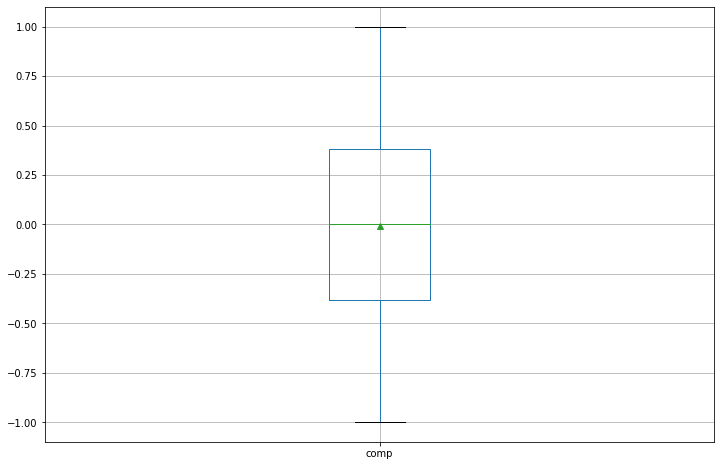

In [ ]:
import matplotlib.pyplot as plt
twtsa.boxplot(column='comp', figsize=(12,8), showmeans=True)


In [ ]:
# SENSITIVITY ANALYSIS OF THE SENTIMENT ANALYSIS################################
threshold = np.linspace(0.1,0.01,30)
total = []
for j in threshold:
  results= []
  for i in range(len(twtsa)):
    if twtsa.iloc[i,0] >= j: 
      result = 1
    elif twtsa.iloc[i,0] <= -j:
      result= -1
    else:
      result= 0
    results.append(result)
    
  neutral = results.count(0)
  positive = results.count(1)
  negative = results.count(-1)
  total.append([positive,neutral,negative])

In [ ]:
n= 26778412
percentages= satotal/n
print(percentages)

In [ ]:
fig = plt.figure(figsize =(8,5)) 
# Create dictionary of keyword aruments to pass to plt.boxplot
dict2 =  {'patch_artist': True,
             'capprops': dict(color='black'), 'boxprops': dict(color='lightblue', facecolor='lightblue'),
             'medianprops': dict(color='black'),
             'whiskerprops': dict(color='black')}
# Creating plot 
bplot = percentages.boxplot(column= ['Positive','Neutral', 'Negative'],**dict2) #, 'Neutral', 'Negative'
plt.ylabel('Percentage of Tweets')
plt.xlabel('Type of Sentiment')
#plt.ylim((0,0.42))
plt.show() 

In [ ]:
### Donwload results ########################3
df=pd.read_csv('./drive/My Drive/TFM/results.csv', encoding = 'latin1')

In [ ]:
#df.columns = ['num','comp']
df= df['comp']
print(df.head(10))

0    1
1   -1
2   -1
3   -1
4   -1
5    1
6    0
7    1
8   -1
9   -1
Name: comp, dtype: int64


In [ ]:
(df == 0).sum() # 5228965
(df == 1).sum() #10886190
(df == -1).sum() #10663257

10886190

In [ ]:
#Dowload compound scores 
twtsa=pd.read_csv('./drive/My Drive/TFM/twtsa.csv', encoding = 'latin1')

In [ ]:
print(twtsa.head(10))

   Unnamed: 0    comp
0           0  0.8430
1           1 -0.2263
2           2 -0.9136
3           3 -0.3182
4           4 -0.3182
5           5  0.1531
6           6  0.0000
7           7  0.7777
8           8 -0.7906
9           9 -0.7906


In [ ]:
results.columns = ['comp']
df= results['comp']
print(df.head(10))

0    1
1   -1
2   -1
3   -1
4   -1
5    1
6    0
7    1
8   -1
9   -1
Name: comp, dtype: int64


In [ ]:
#Check how many cpu's you have in your computer 
import multiprocessing

multiprocessing.cpu_count()

2

In [ ]:
#  TEMPORALITY OF SENTIMENT ANALYSIS ###########################################
#joining the date and the sentiment analysis
#date= pd.date_range(start="2017-09-21",end="2019-05-19").tolist()
#date= pd.DataFrame(date)
#date.columns= ['date']
#temp['date'] = temp['date'].astype('datetime64[ns]')
df2= pd.concat([df.reset_index(drop=True), date.reset_index(drop=True)], axis=1)
#sort by date
df = df2.sort_values(by='date')
#summing by date the sentiment analysis 
temp= df.groupby(['date'])['sa'].sum()
temp.reset_index(drop=True, inplace=True)
import datetime
temp['date']= [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in temp['date']]
#date.columns= ['date']
#temp['date'] = temp['date'].astype('datetime64[ns]')
plotsa= pd.merge(date, temp, on='date', how='left')

In [ ]:
sortsa= plotsa.sort_values(by=['sa'],ascending=False)

In [ ]:
plt.plot(plotsa['date'],plotsa['sa'])
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.tick_params(axis='x', rotation=90)
plt.rcParams["figure.figsize"] = (15,6)
plt.grid()
plt.show()

In [ ]:
#confidence intervals of sentiment analysis
import scipy.stats as st
ci_pos= st.t.interval(alpha=0.95, df=len(satotal['Positive'])-1, loc=np.mean(satotal['Positive']), scale=st.sem(satotal['Positive'])) #(10721008.287961453, 10879864.84537188)
ci_neu= st.t.interval(alpha=0.95, df=len(satotal['Neutral'])-1, loc=np.mean(satotal['Neutral']), scale=st.sem(satotal['Neutral'])) #(5252915.313658239, 5553480.8196750935)
ci_neg= st.t.interval(alpha=0.95, df=len(satotal['Negative'])-1, loc=np.mean(satotal['Negative']), scale=st.sem(satotal['Negative'])) #(10503622.979412757, 10645931.753920577)


In [ ]:
n= 26778412
percentages= satotal/n
print(percentages)

In [ ]:
# visualization of type of sentiment on all dataset 
fig = plt.figure(figsize =(8,5)) 
# Create dictionary of keyword aruments to pass to plt.boxplot
dict2 =  {'patch_artist': True,
             'capprops': dict(color='black'), 'boxprops': dict(color='lightblue', facecolor='lightblue'),
             'medianprops': dict(color='black'),
             'whiskerprops': dict(color='black')}
# Creating plot 
bplot = percentages.boxplot(column= ['Neutral'],**dict2) #, 'Neutral', 'Negative'
plt.ylabel('Percentage of Tweets')
plt.xlabel('Type of Sentiment')
#plt.ylim((0,0.42))
plt.show() 

In [ ]:
########################Distribution of topcis over the document################
dff=pd.read_csv('./drive/My Drive/TFM/dforder.csv', encoding = 'latin1') #download dataset of all tweets

In [ ]:
# Tokenize datset of all tweets
def tokenize(text):
    """
    Parses a string into a list of semantic units (words)
    Args:
        text (str): The string that the function will tokenize.
    Returns:
        list: tokens parsed out
    """
    text = str(text)
    tokens = text.split() # Make text lowercase and split it
    
    return tokens

# Apply tokenizer
dff2['tokens'] = dff2['tweet'].apply(tokenize)

In [ ]:
#Donwnload model
model17_3 =  models.LdaModel.load('model17_3.model')

In [ ]:
# Create a dictionary
id2word = Dictionary(df['tokens'])
print(len(id2word)) #449930
# Filtering Extremes
id2word.filter_extremes(no_below=2, no_above=.95)
print(len(id2word))#100000 

In [ ]:
# Creating a corpus object of the dataset with all tweets
corpus = [id2word.doc2bow(d) for d in dff2['tokens']]

In [ ]:
#FUNCTION to link each tweet with its highest probable topic 
def format_topics_sentences(ldamodel=model17_3, corpus=corpus, texts=dff2['tweet']):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=model17_3, corpus=corpus, texts=dff2['tweet'])

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

In [ ]:
# Number of Documents for Each Topic
topic_counts = df_dominant_topic['Dominant_Topic'].value_counts()
# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)
# Topic Number and Keywords
topic_num_keywords = df_dominant_topic[['Dominant_Topic', 'Keywords']]

# Concatenate Column wise and change column name
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)
df_dominant_topics.columns = ['Dominant_Topic', 'Keywords', 'Num_Documents', 'Perc_Documents']

In [ ]:
topic_key= pd.DataFrame(topic_key)
topic_key.columns=['Dominant_Topic', 'Topic_Keywords']
topic_key

In [ ]:
# Number of Documents for Each Topic WITH CLEANED DATA########################################
topic_counts = dt['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = topic_key[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise & Change Column names
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

df_dominant_topics

In [ ]:
#Find the most representative document for each topic##########################
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = dt.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Topic_Perc_Contrib'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

In [ ]:
#TEMPORALITY OF SA##############################################################
#date= pd.date_range(start="2017-09-21",end="2019-05-19").tolist()
#date= pd.DataFrame(date)
#date.columns= ['date']
#temp['date'] = temp['date'].astype('datetime64[ns]')
df2= pd.concat([df.reset_index(drop=True), date.reset_index(drop=True)], axis=1)
#sort by date
df = df2.sort_values(by='date')
###
temp= df.groupby(['date'])['sa'].sum()
plotsa= pd.merge(date, temp, on='date', how='left')
print(plotsa)

In [ ]:
sortsa= plotsa.sort_values(by=['sa'],ascending=False)
print(sortsa[0:30])

In [ ]:
plt.plot(plotsa['date'],plotsa['sa'])
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.tick_params(axis='x', rotation=90)
plt.rcParams["figure.figsize"] = (15,6)
plt.grid()
plt.show()

In [ ]:
#Download data for sentiment analysis
dt=pd.read_csv('./drive/My Drive/TFM/df_dominant_topic.csv', encoding = 'latin1')
date=pd.read_csv('./drive/My Drive/TFM/date2.csv', encoding = 'latin1')
results=pd.read_csv('./drive/My Drive/TFM/results.csv', encoding = 'latin1')

In [ ]:
#############################################
#merging topics with sentiment analisis 
result= pd.concat([dt, date, results], axis=1))
result.dropna(subset = ["Text"], inplace=True)
result

In [ ]:
# frequency by TOPIC ######################################################################
#Do this for every topic 
# 0,8,1, 11,3 
topic1= result[result.Dominant_Topic== 0]
topic1

In [ ]:
temp1=pd.crosstab(index=topic1['date'], columns='count')
temp1.reset_index(level=0, inplace=True)
temp1.columns= ['date', 'count']
temp1

In [ ]:
dd= pd.date_range(start="2017-10-23",end="2019-05-19").tolist()
dd= pd.DataFrame(dd)
dd.columns= ['date']
temp1['date'] = temp1['date'].astype('datetime64[ns]')
plott1= pd.merge(dd, temp1, on='date', how='left')

In [ ]:
fig = plt.figure(figsize=(14,5))
axis = brokenaxes(ylims=((0, 70000),(120000, 140000)), hspace=0.2)
axis.plot(plott1['date'],plott1['count'],color = 'darkgreen')
axis.grid(axis='both', which='major', ls='--')
plt.ylabel('Daily Sentiment Analysis of the UK',labelpad=70)
plt.xlabel('Date',labelpad=40)
plt.rc('font', size=16) 
plt.plot()
plt.show()

In [ ]:
############# SA BY COUNTRY#############################################################3
#Download users location preprocessed
final=pd.read_csv('./drive/My Drive/TFM/final_loc.csv', encoding = 'latin1')

In [ ]:
find = pd.concat([final, date, results], axis=1)
find #26519326final

In [ ]:
# Clean user location
find.obs[find['name']== 'usa']= 'usa'
find.obs[find['name']== 'u k']= "uk"
find.obs[find['name']== 'u k '] = "uk"

find.obs[(find['name']== 'america') & (find['obs'].isnull())] = 'usa'

usa= ["united states of america"," usa",'n y c', 'manhattan', "brooklyn", "u s a","new york","new york city","nyc" "florida", "washington", "california", "nyc", "portland","new orleans","nashville","san diego","los angeles","denver","austin","seattle","chicago","boston","san francisco","texas"]
for i in usa: 
  find.obs[(find['name'].str.contains(i, na=False))& (find['obs'].isnull())]='usa'

uk= [" uk","manchester","edinburgh","glasgow","scotland","brighton","birmingham","london","united kingdom","england",'belfast', 'ireland', 'yorkshire', 'southampton', 'nottingham', 'leeds', 'newcastle', 'liverpool', 'dublin' ]
for i in uk: 
  find.obs[(find['name'].str.contains(i, na=False))& (find['obs'].isnull())]='uk'

cana= ["canada","canadian","toronto", 'vancouver', 'montreal', 'ottawa', 'calgary', 'quebec', 'edmonton', 'winnipeg', 'victoria', 'hamilton', 'halifax', 'british columbia', 'alberta', 'saskatchewan', 'manitoba', 'ontario', 'new brunswick', 'nova scotia', 'yukon' ]
for i in cana: 
  find.obs[(find['name'].str.contains(i, na=False))& (find['obs'].isnull())]='canada'

aus= ["australia",'sydney', 'melbourne', 'perth', 'adelaide','brisbane', 'gold coast', 'hobart', 'canberra', 'darwin','cairns', 'alice springs', 'wollongong', 'melbourne' ]
for i in aus: 
  find.obs[(find['name'].str.contains(i, na=False))& (find['obs'].isnull())]='australia'

In [ ]:
# frequency by Country ######################################################################
# USA, CANADA, UK, Australia
country= find[find.obs== 'ca'] 
country

In [ ]:
#summing by date the sentiment analysis ################################################################3
temp= country.groupby(['date'])['comp'].sum()
temp= pd.DataFrame(temp)
temp.reset_index(level=0, inplace=True)

In [ ]:
#dd= pd.date_range(start="2017-09-21",end="2019-05-19").tolist()
#dd= pd.DataFrame(dd)
#dd.columns= ['date']
temp['date'] = temp['date'].astype('datetime64[ns]')
plotc= pd.merge(dd, temp, on='date', how='left')
plotc.sort_values(by=['comp'],ascending=True)

In [ ]:
plt.plot(plotc['date'],plotc['comp'],color="darkblue")
plt.xlabel('Date')
plt.ylabel('Daily Sentiment Analysis of Australia')
plt.tick_params(axis='x', rotation=90)
plt.rcParams["figure.figsize"] = (14,5)
plt.rc('font', size=16) 
#plt.set_ylim([0,140000])
plt.grid()
plt.show()